# 机器学习入门课程 I

## 前言

### 准备

这是一门给机器学习零基础的人的入门课程，学习此课程希望您具有以下基础。

- 高等数学或微积分，能够熟练地计算函数的导数以及链式求导法则
- 线性代数，熟悉矩阵计算
- 熟悉 Python 的基础语法

原则上，不需要其他额外的数学知识。在这门课中，您将学到：

- 机器学习可以用来做什么？
- 对于一个具体问题，如何建立一个模型进行预测？

### 进一步学习

如果在这门课程之后，想进一步学习机器学习的知识，推荐以下资源：

1. 机器学习(cs229简化版) Andrew Ng <https://www.coursera.org/learn/machine-learning>
2. 《机器学习》 周志华
3. 熟读理论千百遍，不如动手去实践,Kaggle比赛 <https://www.kaggle.com/competitions>

## 机器学习简介

### 机器学习历史简述
现在人们通常将机器学习和人工智能联系在一起，实际上，人工智能涉及的领域更加宽泛，机器学习只是其中一种手段。
人工智能的起源可以追溯到上世纪50年代，1956年举办的达茂思会议([Dartmouth Conference](https://en.wikipedia.org/wiki/Dartmouth_Workshop))，在这次会议上，信息论之父Shannon和IBM科学家Nathan Rochester等人，
一起探讨了一个议题：精确地描述学习过程和智能的特征并用机器进行模拟。

人工智能发展的初期，研究者致力于将人类的知识表达为一些逻辑规则，然后利用搜索进行逻辑推理，进而实现智能，到后来演变到利用知识库构造专家系统，实现所谓的智能。这期间，比较有名的成就有IBM的国际象棋程序深蓝打败国际象棋冠军。这一阶段的人工智能实现，更像人类的演绎推理，利用少量的规则，加上知识库，进行推演，从而得出结论。但是，规则的归纳需要人类专家干预，限制了这种模式的发展。2000年以后，随着互联网和摩尔定律的发展，产生了大量的数据和计算资源，使得人们可以利用机器从数据中自动归纳出规则，也就是数据驱动的智能。这其中的工具就是机器学习！

所以，**机器学习就是利用一种程序从数据中自动归纳出有价值的知识的一种方法**。

### 机器学习可以干啥

具体来讲，机器学习可以用来做很多事情，目前已经有成功案例的就有很多。例如

- 计算广告：利用用户历史的行为数据，做广告的点击率(CTR)预估 <https://tech.meituan.com/deep-understanding-of-ffm-principles-and-practices.html>
- 推荐系统：利用用户历史行为做商品推荐 <https://book.douban.com/subject/10769749/>
- 游戏：Alpha Go <https://deepmind.com/research/alphago/>
- 金融：大数据风控
- 自然语言处理：机器翻译
- 语音识别
- 图像识别
- etc

接下来，我们就用一个实际的例子来解释机器学习是如何从数据中学到有用知识的。

## 从0开始机器学习

接下来，我们将利用一个简单的分类任务，给读者展示机器学习如何从数据中学到有用知识的。
强烈建议您跟着这个教程亲自动手操作一遍，为此，您需要做一下准备工作。

- 安装 Python2.7 <https://www.python.org/downloads/release/python-2713/>
- 安装Python包
    - scikit-learn <http://scikit-learn.org/stable/install.html>
    - pandas
    - matplotlib, seaborn, graphviz 绘图

### 任务与数据

本任务采用鸢尾花(iris)数据集，你可以从UCI网站上下载<https://archive.ics.uci.edu/ml/datasets/Iris>。
如果已经安装了 scikit-learn，那么可以利用提供的dataset接口直接调用。
鸢尾花数据集是著名的统计学家 Fisher 提供的。
下面我们用一段简单的Python代码加载该数据集看一看。

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

plt.style.use('seaborn-talk')

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# 随机选取几条数据
idx = range(df.shape[0])
np.random.shuffle(idx)

print iris.target_names
df.iloc[idx].head(10)

['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
114,5.8,2.8,5.1,2.4,2
108,6.7,2.5,5.8,1.8,2
54,6.5,2.8,4.6,1.5,1
96,5.7,2.9,4.2,1.3,1
143,6.8,3.2,5.9,2.3,2
102,7.1,3.0,5.9,2.1,2
47,4.6,3.2,1.4,0.2,0
7,5.0,3.4,1.5,0.2,0
140,6.7,3.1,5.6,2.4,2
18,5.7,3.8,1.7,0.3,0


该数据集的每一条记录代表一个样本，每一个样本有4个属性变量：

- sepal length (cm) 萼片长度
- sepal width (cm) 萼片宽度
- petal length (cm) 花瓣长度
- petal width (cm) 花瓣宽度

每一个样本有1个目标变量target，target有3个取值，每一种取值的意义如下：

- 0： setosa 山鸢尾 
- 1： versicolor 变色鸢尾
- 2： virginica 维吉尼亚鸢尾

每一种鸢尾花的图片如下，从左到右分别是 setosa,versicolor,virginica

<img alt="setosa" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/86/Iris_setosa.JPG/800px-Iris_setosa.JPG" width="300" style="float:left; margin-right:10px;"/>
<img alt="versicolor" src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/Blue_Flag%2C_Ottawa.jpg/800px-Blue_Flag%2C_Ottawa.jpg" width="300" style="float:left; margin-right:10px;"/>
<img alt="virginica" src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/1024px-Iris_virginica.jpg" width="300" style="float:left; margin-right:10px;"/>


### 建模

我们的目标是，建立一个模型，输入鸢尾花的4个属性变量，能够对鸢尾花的种类进行判别。
这样一旦模型建立好了之后，对新看到的鸢尾花，只要测量了这4个属性，就可以利用模型对它的类别进行预测了。

数学地角度来说，我们要确定一个函数 $f: R^4 \rightarrow \{0,1,2\}$，输入是一个4维向量 $\vec{x} = (x_1, x_2, x_3, x_4)$，
每一维代表一个属性变量的值，输出一个分类变量 $y \in \{0,1,2\}$，代表该样本属于哪个类别。
所谓的建模过程，就是利用我们已经观测到的数据集，去确定这个函数 $f$ 的具体形式和参数。
这里每一个属性我们都称作一个特征，输出分类变量我们陈做目标（或建模目标），这里的函数 $f$ 就是我们通常所说的模型。

#### 简单规则模型

在建立复杂模型之前，我们先来建立一种简单规则模型。所谓的简单规则，就是对一个属性，通过规则判定，确定该样本属于哪一个类。
比如，我们可以进行数据分析，观察每一种花的萼片长度、萼片宽度、花瓣长度、花瓣宽度的平均值。

/Library/Python/2.7/site-packages/matplotlib/axes/_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.4, right=1.4
  'left=%s, right=%s') % (left, right))


Text(0,0.5,u'\u5e73\u5747\u503c')

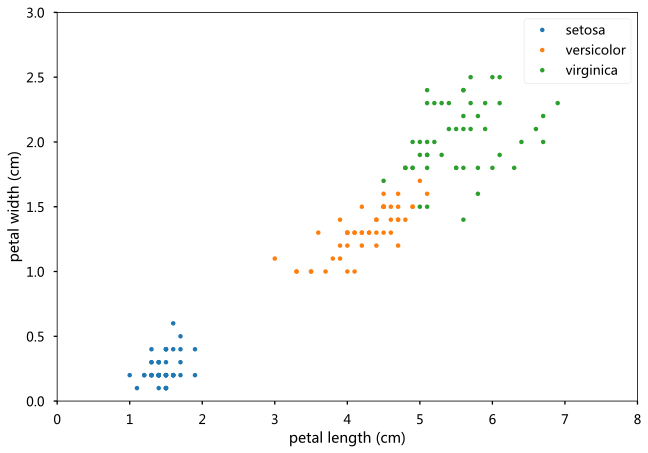

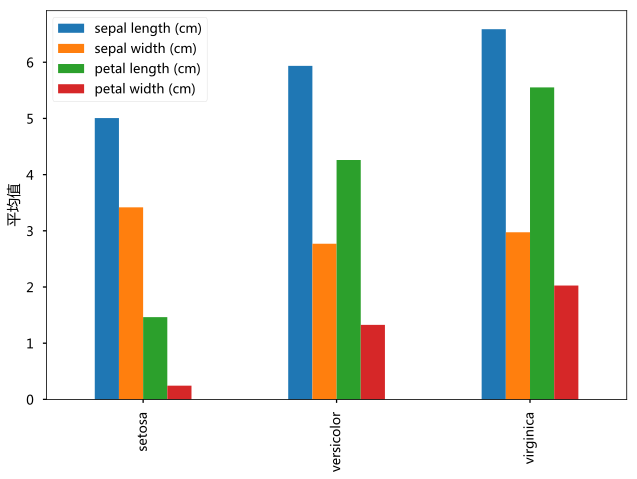

In [2]:
ax = plt.gca()
df.groupby(by='target').plot(kind='line', x='petal length (cm)', y='petal width (cm)', style='.', ax=ax)
ax.set_xlim([0,8])
ax.set_ylim([0,3])
plt.legend(iris.target_names, loc='best')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

df.groupby(by='target').mean().plot(kind='bar')
plt.xticks([0,1,2], iris.target_names);
plt.xlabel('')
plt.ylabel(u'平均值')

通过上述分析，可以看到三种花的花瓣长度(petal length)差异比较大，
setosa的平均花瓣长度在1.5cm左右，versicolor的平均花瓣长度在4.2cm左右，
而 virginica的平均花瓣长度在5.6cm左右。
因此，一种简单规则模型可以归纳为

$$
target = 
\begin{cases}
0, \text{petal length} \lt 2.8 \\
1, \text{petal length} \in [2.8, 4.9) \\
2, \text{petal length} \ge 4.9
\end{cases}
$$

这里分割点的值取的是两种花平均中的平均数。

好了，到目前为止，你已经学会了数据挖掘过程中的最简单情景了。
通过数据分析，归纳出规则，然后将规则编码成一个函数，从而得到一个预测模型，
可以用来做预测。

很快，我们会发现，这种方法需要人工进行数据分析，总结出规则，那么能不能够让程序自动地找到这些规则，甚至发现更复杂的规则呢？
答案是肯定的，决策树就是这样一种模型，自动地发现这些规则，甚至高阶组合规则。

#### 决策树模型

前面我们已经说过，决策树是这样一种模型，它可以自动地发现一些区分目标的规则，甚至高阶组合规则。
决策树如何发现这些规则我们暂时不要去深究，作为一个入门课程，我们重点是了解模型能干啥。
这里，我们利用 scikit-learn 软件包里面的决策树模型工具，建立模型。

决策树模型分为回归和分类，如果目标变量是类别变量，这样的问题成为分类，我们这个任务就是分类。
而如果目标变量是连续变量，例如预测房价，那么这样的问题就是回归。
这里我们只用分类就好了，对应的类是 `DecisionTreeClassifier`，
为了便于观察，我们限定树的深度为2。
为了让决策树模型能够从数据中学会规则，我们需要调用模型的 `fit` 方法，
并将数据（包括特征`iris.data`和目标`iris.target`）传给它。

模型从数据中自动学会这些规则的过程，我们称之为**训练**或者**拟合**。
因此，`fit`方法实际上就是在做**模型训练**！

模型训练好了之后，我们可以将决策树画出来，进行观察。

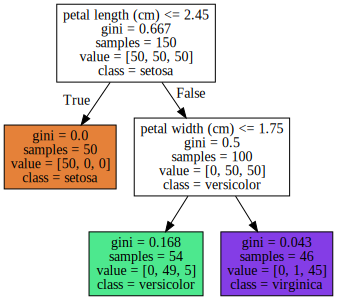

In [3]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

clf = DecisionTreeClassifier(max_depth=2)
clf.fit(iris.data, iris.target)

dot_data = export_graphviz(clf, feature_names=iris.feature_names, 
                           class_names = iris.target_names, 
                           out_file=None, filled=True)

graphviz.Source(dot_data)

决策树模型是由规则组成的一棵决策树，它的节点分为内部节点和叶子节点。
内部节点对应一条分裂规则，叶子节点对应一个判决或者输出，对于分类任务输出的类别是满足这个规则样本最多的那个类别。

上面的决策树是一颗二叉树，根节点对应规则是petal length (cm) <= 2.45，
如果满足这条规则，就到了左子树，左子树是一个叶子节点，满足这条规则到达左子树的样本有50个，且全部为setosa这个类别，因此输出类别是 setosa。

这和前面我们通过数据分析得出的规则 petal length < 2.8 则为setosa，非常接近。



#### 线性模型

线性模型和决策树模型行为完全不同，线性模型的出发点是对每一类，计算一个分数

$$
score_i = b_i + \vec{w} _i^T \vec{x}
$$

然后选择出得分最大的类作为预测的类。
模型的权重$\vec{w} _i$称作模型参数，通过优化算法优化得到。
优化模型参数的过程就叫做模型训练！

线性模型（确切地说是线性多分类模型）里面最典型的是多分类逻辑回归，
它将每个类的分数做归一化，得到样本归属于该类的概率

$$
P(i|\vec{x}) = \frac{e^{score_i}}{\sum_i e^{score_i}}
$$

下面利用`scikit-learn`多分类逻辑回归工具 `LogisticRegression` 进行建模。

Text(0,0.5,u'petal length + petal width')

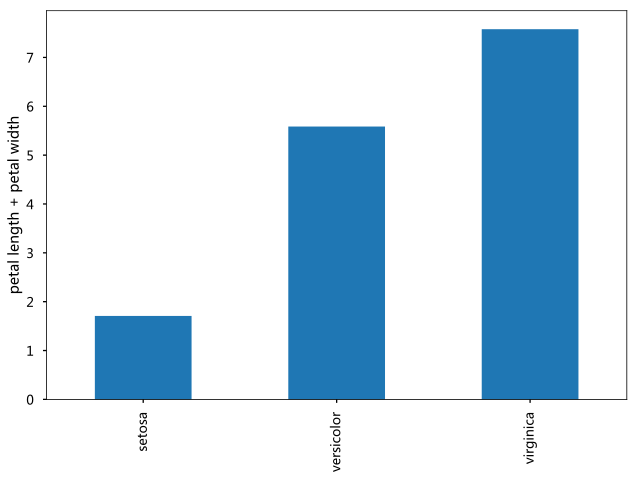

In [7]:
df['petal length + petal width'] = df['petal length (cm)'] + df['petal width (cm)']
df.groupby(by='target').mean()['petal length + petal width'].plot(kind='bar')
plt.xticks([0,1,2], iris.target_names);
plt.xlabel('')
plt.ylabel(u'petal length + petal width')

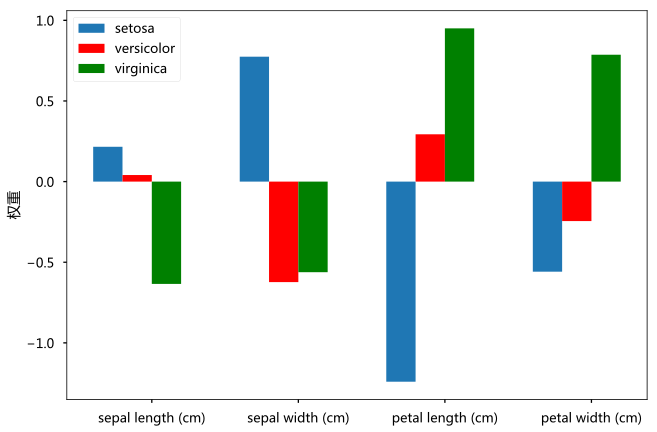

In [5]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=0.1)
lr.fit(iris.data, iris.target)

plt.bar(np.arange(4)-0.3, lr.coef_[0], width=0.2)
plt.bar(np.arange(4)-0.1, lr.coef_[1], width=0.2, color='r')
plt.bar(np.arange(4)+0.1, lr.coef_[2], width=0.2, color='g')
plt.xticks(range(4), iris.feature_names);
plt.ylabel(u'权重')
plt.legend(iris.target_names, loc='best')

从模型参数来看，sepal length 和 sepal width 数值大的类别setosa的得分更高，
petal length 数值较大的 versicolor的得分更高，
petal length 和 petal width 数值大的 virginica 得分更高。

#### 预测

一旦模型建立好了之后，我们就可以利用模型进行预测了，
所谓的预测，是指对于一个新的样本，比如我在某个路边看到了一朵鸢尾花，
不知道到底是哪一类，就可以利用这个模型进行预测。
首先，我们需要测量模型预测所需要的4个数据（特征），花萼的长度和宽度，花瓣的长度和宽度，
然后输入的模型中去。

对预测前面简单规则模型，只需要花瓣的长度数据即可预测。
对于决策树模型，实际上只需要花瓣的长度和宽度数据也可预测，如果我们将决策树深度变得更深，那么就可能要用到所有数据。
首先，决策树从根节点开始搜索，根节点对应一条规则 petal length (cm) <= 2.45，
如果满足这条规则，就到左子树，预测输出为setosa。
如果不满足，那么就到右子树，右子树根节点还是一个规则 petal width (cm) <= 1.75。
我们重复这个过程，直到找到该样本满足规则的叶子节点，叶子节点对应的输出值就是模型预测结果。

## 总结

这里我们以鸢尾花分类任务为例，构建了一个决策树模型进行预测。
总结起来，所谓的建模过程，就是利用已有的标注数据（已知目标变量的值的数据），
自动学习到一个函数 $f:R^n \rightarrow Y$，根据观察到的特征向量，计算得到目标变量的值。
这个任务就是一个3分类的函数。
虽然这个任务简单，但是和更复杂的任务都具有以下3个基本步骤：

- 收集（标注）数据
- 建立模型
- 预测

不同的业务可能收集到的数据不同，收集到的原始数据需要加工成模型能用的数据（即特征）。

不同的任务可以设立不同的目标进行建模，比如预测性别，那么目标变量是男和女；预测年龄，那么目标变量是个0-100之间的连续值；
预测股价涨跌，那么目标变量就是涨和跌。

相同数据和目标的情况下，也可以选择不同的模型，决策树是一个久经沙场的模型，它的两个变体**随机森林**和**梯度提升树**应用非常广泛。
近年来的深度神经网络，可以利用非常原始的数据进行建模，减少了人工特征工程的工作量。
但是本质上，他们都在干同一件事情，学习这样一个函数！